# Austin Housing 


> TO DO 

In [2]:
!mkdir <DIRECTORY>/.kaggle # rename to your directory if needed 

In [5]:
import os

directory = '<DIRECTORY>/.kaggle' # rename to your directory if needed
os.environ['KAGGLE_CONFIG_DIR'] = directory # SUPER IMPORTANT 

In [16]:
# !pip install kaggle

In [9]:
!chmod 600 /Users/michaelfronda/Desktop/Main/ML_Zoomcamp/Midterm_Project/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d ericpierce/austinhousingprices

100%|█████████████████████████████████████▉| 2.34G/2.34G [01:50<00:00, 26.4MB/s]
100%|██████████████████████████████████████| 2.34G/2.34G [01:50<00:00, 22.7MB/s]


In [10]:
!ls 

EDA.ipynb               austinhousingprices.zip


In [14]:
# !unzip -o austinhousingprices.zip

In [15]:
# !rm -r austinhousingprices.zip
# !rm -r homeImages

In [13]:
!ls 

EDA.ipynb             austinHousingData.csv


# EDA 

In [17]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('austinHousingData.csv')

print('Sample (3)\n##########################################\n')
display(df.sample(3))
print()
display(df.head(1).T)

Sample (3)
##########################################



,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
11658,29407567,austin,6706 Tulane Dr,78723,Relish the outdoors in this made-for-entertain...,30.312510,-97.669159,1.98,2,False,...,1,1,1.266667,3.333333,569,13,1.0,3,1,29407567_f9aa08264c91a711447c798b7a0f589e-p_f.jpg
9580,29393053,austin,3113 Lafayette Ave,78722,"French Place charmer! TCAD incorrect - 1,105 S...",30.287943,-97.719635,1.98,0,False,...,1,1,1.366667,6.666667,1156,15,2.0,2,1,29393053_dbae86e4546d826d58c92c5c467821ba-p_f.jpg
5233,29486313,austin,3911 Kandy Dr,78749,If you are interested in viewing the home plea...,30.210871,-97.839378,1.98,0,False,...,1,1,1.100000,4.666667,887,14,2.0,3,1,29486313_4cd8fdd866ada9e3289fad91137b7e86-p_f.jpg


,0
zpid,111373431
city,pflugerville
streetAddress,14424 Lake Victor Dr
zipcode,78660
description,"14424 Lake Victor Dr, Pflugerville, TX 78660 i..."
latitude,30.430632
longitude,-97.663078
propertyTaxRate,1.98
garageSpaces,2
hasAssociation,True


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zpid,15171.0,1.044193e+08,3.179426e+08,2.858495e+07,2.941115e+07,2.949441e+07,7.033762e+07,2.146313e+09
zipcode,15171.0,7.873593e+04,1.889348e+01,7.861700e+04,7.872700e+04,7.873900e+04,7.874900e+04,7.875900e+04
latitude,15171.0,3.029160e+01,9.697306e-02,3.008503e+01,3.020331e+01,3.028442e+01,3.036658e+01,3.051732e+01
longitude,15171.0,-9.777853e+01,8.471490e-02,-9.802206e+01,-9.783801e+01,-9.776954e+01,-9.771790e+01,-9.756950e+01
propertyTaxRate,15171.0,1.994085e+00,5.310204e-02,1.980000e+00,1.980000e+00,1.980000e+00,1.980000e+00,2.210000e+00
garageSpaces,15171.0,1.229187e+00,1.352117e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
parkingSpaces,15171.0,1.224507e+00,1.352732e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.200000e+01
yearBuilt,15171.0,1.988555e+03,2.157946e+01,1.905000e+03,1.974000e+03,1.993000e+03,2.006000e+03,2.020000e+03
latestPrice,15171.0,5.127677e+05,4.531853e+05,5.500000e+03,3.090000e+05,4.050000e+05,5.750000e+05,1.350000e+07
numPriceChanges,15171.0,3.032892e+00,2.487392e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.300000e+01


## General Cleaning

In [83]:
# exclude `homeImage` 
# ID to images, we will keep the dataset simple
df = df.drop(columns=['homeImage'])

In [84]:
# only 2 nulls
df.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [85]:
# for simplicity will be not be using description as a main feature
# saves us time on NLP analysis but could be a step in the future
df[df['description'].isnull()]

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
13491,58316504,austin,6617 Back Bay Ln,78739,NaN,30.189535,-97.897896,1.98,2,True,...,0,1,1,1.533333,8.666667,1664,18,3.0,4,2
14310,29348314,austin,5842 Westslope Dr,78731,NaN,30.345671,-97.784264,1.98,2,True,...,0,1,1,2.733333,7.000000,1177,16,6.0,4,3


In [86]:
# object type
object_col = list(df.select_dtypes(include='object').columns)
object_col

['city',
 'streetAddress',
 'description',
 'homeType',
 'latest_saledate',
 'latestPriceSource']

In [87]:
# check unique values for object columns 
for c in object_col: 
    print('{}:  {}'.format(c, df[c].nunique()))

city:  9
streetAddress:  15164
description:  15132
homeType:  10
latest_saledate:  958
latestPriceSource:  225


In [88]:
# check values for city and homeType
display(df.city.unique())
display(df.homeType.unique())

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

array(['Single Family', 'Residential', 'Mobile / Manufactured',
       'Townhouse', 'Condo', 'Vacant Land', 'Multiple Occupancy', 'Other',
       'Apartment', 'MultiFamily'], dtype=object)

In [89]:
# road is interesting, double check it 
df[df['city'] == 'road']

# looks like an error lets reassign the city based on zipcode

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
7191,40988299,road,725 Sly Pass,78748,"Stunning 4 Bedroom, 3 Full, 2 Half Bath Home o...",30.158154,-97.813858,1.98,0,False,...,0,1,1,0.933333,3.333333,1424,14,5.0,4,2


In [90]:
# looks like Austin should be the city
df[df['zipcode'] == 78748]['city'].unique()

array(['austin', 'road'], dtype=object)

In [98]:
# set city 
df.loc[df['city'] == 'road', 'city'] = 'austin'

In [135]:
display(df['homeType'].value_counts())
display(df['homeType'].value_counts(normalize=True)) # for percents 

# since majority of houses are single family, condo, or townhouses, lets filter on those exclusively

homeType
Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: count, dtype: int64

homeType
Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Residential              0.002439
Apartment                0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: proportion, dtype: float64

In [138]:
df = df[df['homeType'].isin(['Single Family', 'Condo', 'Townhouse'])]

In [139]:
rows, columns = df.shape 

print('rows: {}\ncolumns: {}'.format(rows, columns))

rows: 14885
columns: 46


## Dependent Variable: Price

> Main Objective is to determine the price of the potential homes based on features provided by users

Explore Price

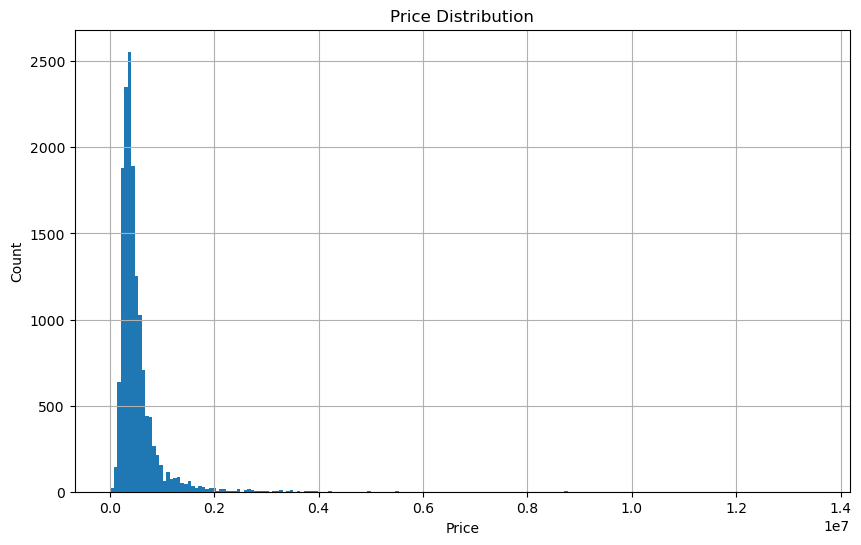

In [140]:
plt.figure(figsize=(10,6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
df['latestPrice'].hist(bins=200);

# positive skew, suggests that there are outliers 

In [141]:
df[['latestPrice']].describe()

,latestPrice
count,1.488500e+04
mean,5.118313e+05
std,4.413477e+05
min,5.500000e+03
25%,3.090000e+05
50%,4.050000e+05
75%,5.750000e+05
max,1.350000e+07


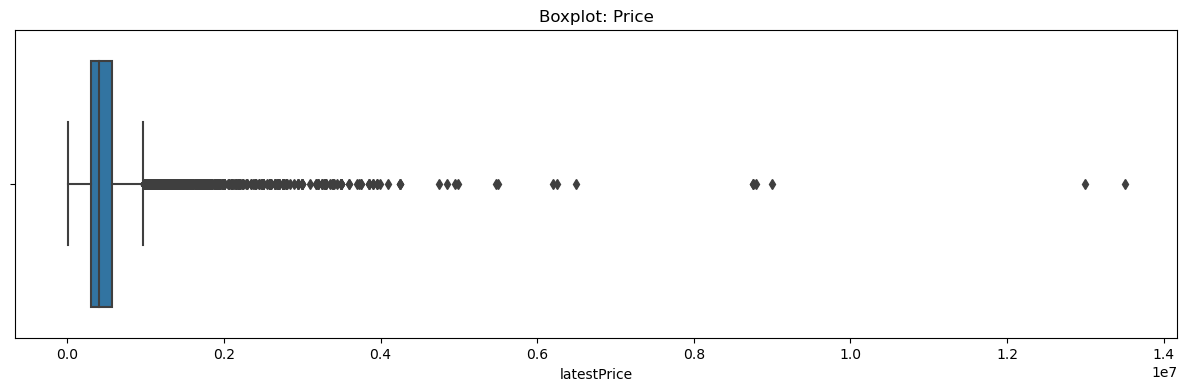

In [142]:
plt.figure(figsize=(15,4))
plt.title('Boxplot: Price')
sns.boxplot(df, x='latestPrice');

# highly priced houses are skewing the mean house as we can see

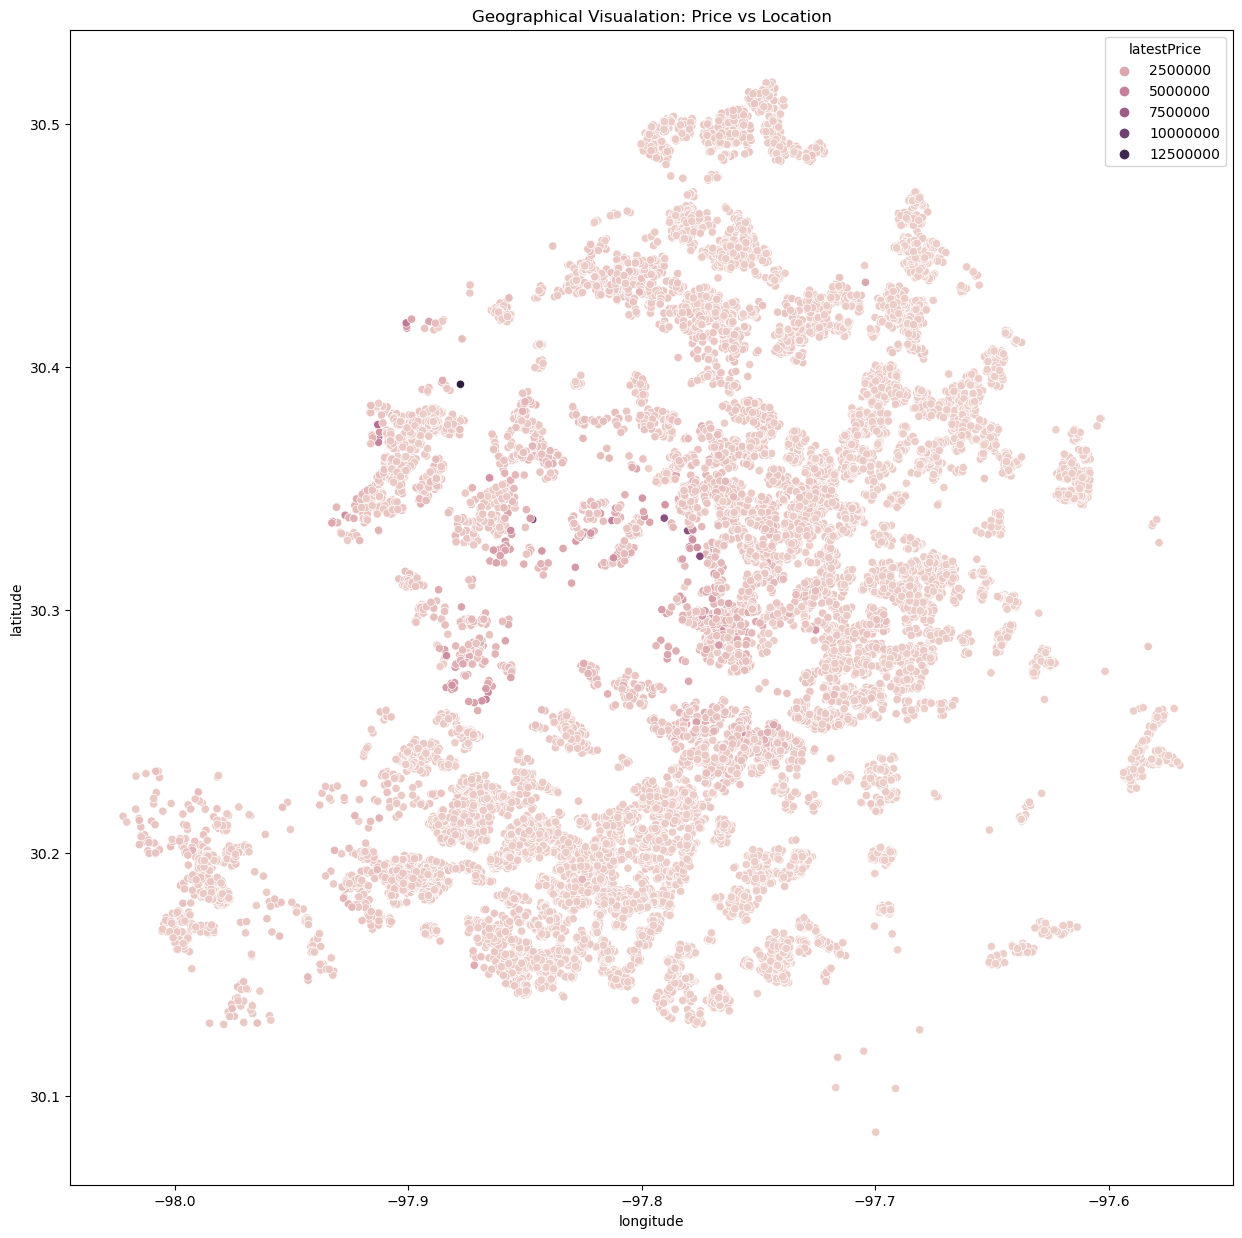

In [146]:
plt.figure(figsize=(15,15))
plt.title('Geographical Visualation: Price vs Location')
sns.scatterplot(df, x='longitude', y='latitude', hue='latestPrice');

In [160]:
avgprice_zip = df[['zipcode', 'latestPrice']].groupby(['zipcode']).mean().reset_index().rename(columns={'latestPrice': 'avgPriceZipcode'})
avgprice_zip

,zipcode,avgPriceZipcode
0,78617,1.962951e+05
1,78619,7.531492e+05
2,78652,3.753398e+05
3,78653,2.382933e+05
4,78660,2.855341e+05
5,78701,9.964750e+05
6,78702,5.136729e+05
7,78703,1.188997e+06
8,78704,8.447818e+05
9,78705,6.512226e+05


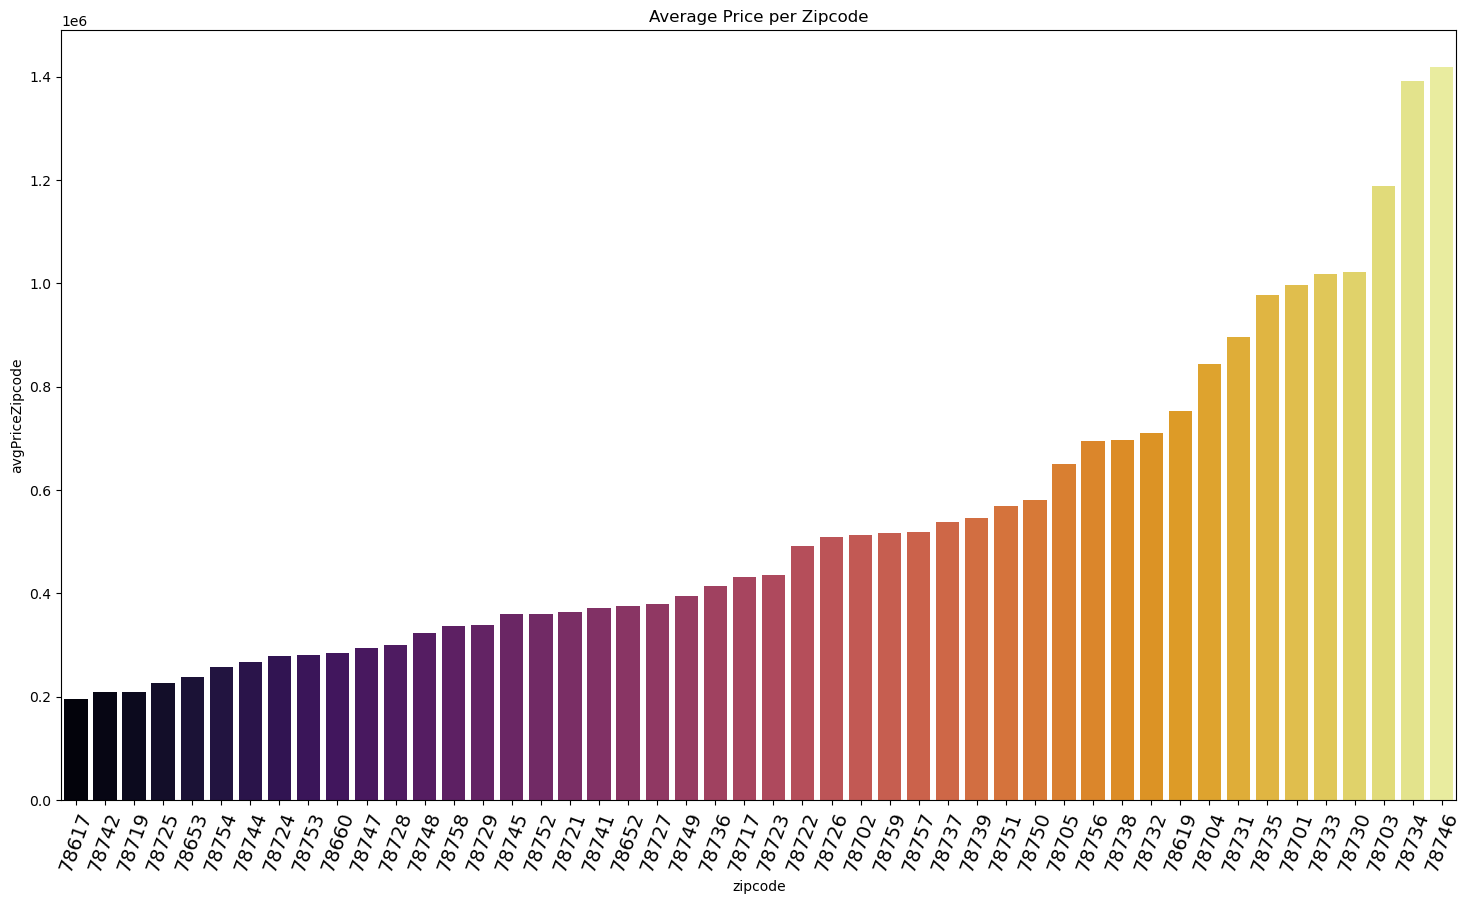

In [186]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=70, fontsize=14)
plt.title('Average Price per Zipcode')
sns.barplot(avgprice_zip, 
            x='zipcode',
            y='avgPriceZipcode', 
            palette='inferno',
            order=avgprice_zip.sort_values('avgPriceZipcode').zipcode);